# House Price Prediction - Advanced Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import os
import pandas as pd 
import seaborn as sns

In [2]:
path = "../input/house-prices-advanced-regression-techniques/"
train = path + "train.csv"
test = path + "test.csv"
sample_sub = path + "sample_submission.csv"

In [3]:
train_df = pd.read_csv(train)
test_df = pd.read_csv(test)
sample = pd.read_csv(sample_sub)

print(f"Training Data Shape  : {train_df.shape} \nTesting Data Shape : {test_df.shape}\nSample Submission : {sample.shape}")

Training Data Shape  : (1460, 81) 
Testing Data Shape : (1459, 80)
Sample Submission : (1459, 2)


In [4]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [6]:
sample.head(2)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989


In [7]:
test_df["SalePrice"] = sample["SalePrice"]

In [8]:
merged_df = test_df.merge(sample, how = "inner", on = ["Id","SalePrice"])
merged_df.shape

(1459, 81)

In [9]:
merged_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


## Combine Datasets

In [10]:
combined_df = pd.concat([train_df, merged_df])
combined_df.shape

(2919, 81)

In [11]:
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


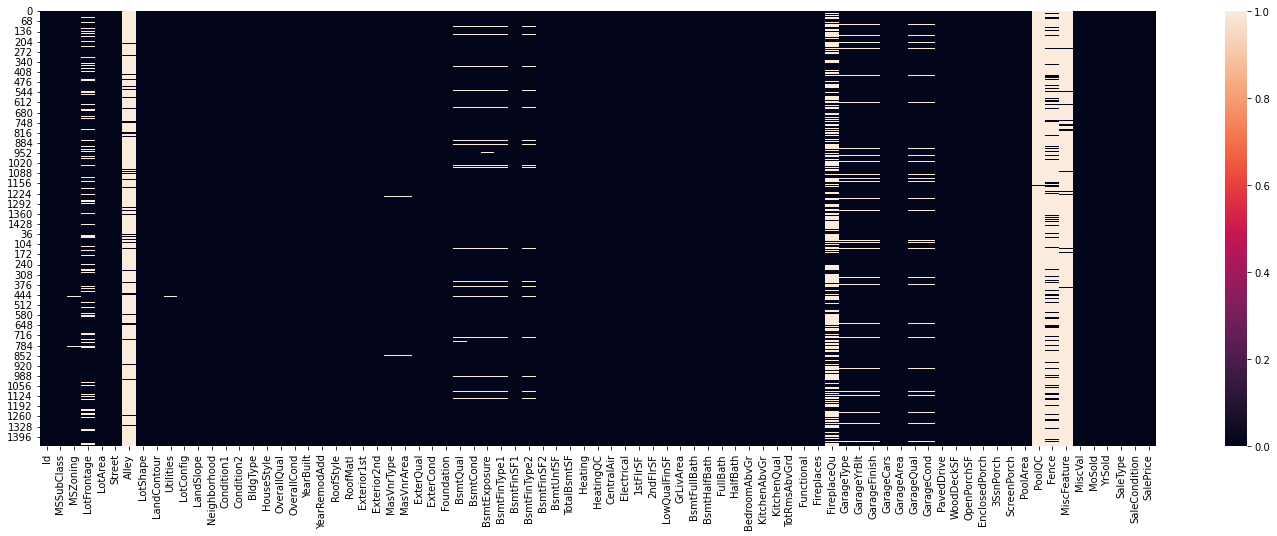

In [12]:
plt.figure(figsize=(25,8))
sns.heatmap(combined_df.isna())
plt.show()

## Handling Missing Values

In [13]:
extreme_cols = [k for k,v in dict(zip(combined_df.columns, combined_df.isnull().sum())).items() if v > 1000 ]
extreme_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
# drop columns with more than 1000 missing values
for col in extreme_cols:
    combined_df.drop(col, inplace=True, axis=1)

In [15]:
combined_df.shape

(2919, 76)

In [16]:
missing_cols = [k for k,v in dict(zip(combined_df.columns, combined_df.isnull().sum())).items() if v > 0 ]
len(missing_cols)

29

In [17]:
# categorical columns with missing values
cat_col = [col for col in missing_cols  if combined_df[col].dtype == object]

# numerical columns with missing values
num_col = [col for col in missing_cols  if combined_df[col].dtype != object]

In [18]:
for col in num_col: 
    combined_df[col]  = combined_df[col].fillna(combined_df[col].mean())

In [19]:
for col_ in cat_col: 
    combined_df[col_]  = combined_df[col_].fillna(combined_df[col_].mode()[0])

In [20]:
combined_df.isna().any().sum()

0

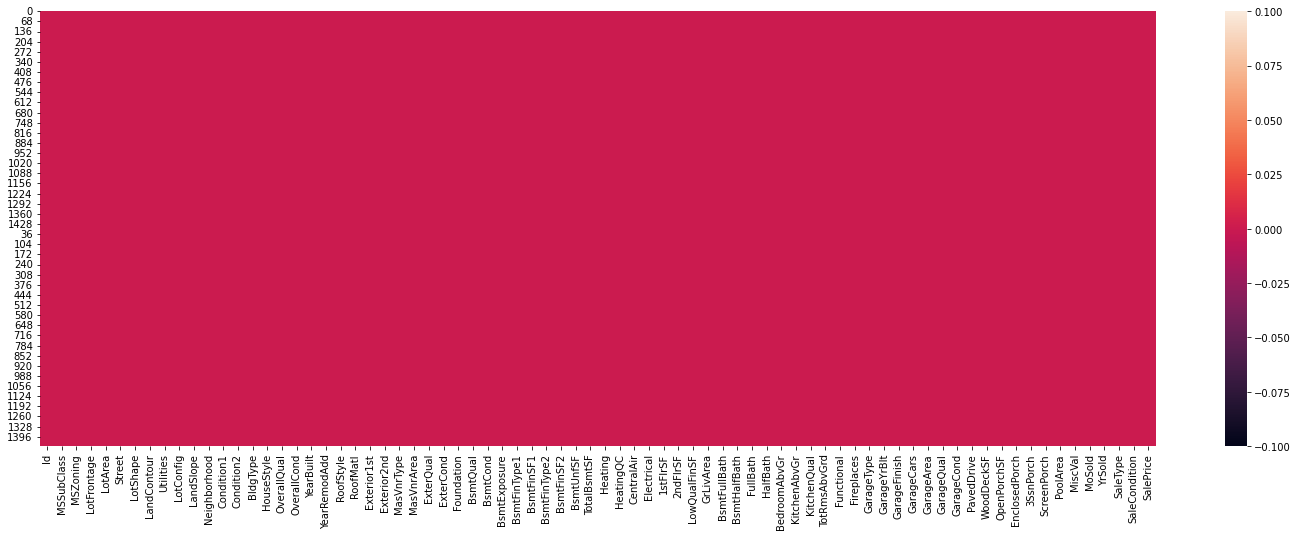

In [21]:
plt.figure(figsize=(25,8))
sns.heatmap(combined_df.isna())
plt.show()

In [22]:
combined_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [23]:
# categorical columns (columns with text)
cat_cols = [col for col in combined_df.columns if combined_df[col].dtype == object]

# numeric columns (columns with numerical values)
num_cols = [col for col in combined_df.columns if combined_df[col].dtype != object]
num_cols = num_cols[1:-1]

In [24]:
test = combined_df.iloc[1460 : , : ]
train = combined_df.iloc[ : 1460, :]

In [25]:
test.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,187758.393989


In [26]:
# drop Id for test and train (won't give us much information during learning)
# Id only useful for submission - Index will help with identifying each row (since they are ordered)

X_test = test.iloc[ : , 1:-1]
y_test = test.iloc[ : , -1]

In [27]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0


In [28]:
# drop Id for test and train (won't give us much information during learning)
# Id only useful for submission - Index will help with identifying each row (since they are ordered)

X_train = train.iloc[ : , 1: -1]
y_train = train.iloc[ : , -1]

In [29]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [30]:
models = {
    "lnr" : LinearRegression(),
    "abr" : AdaBoostRegressor(),
    "bgr" : BaggingRegressor(),
    "gbr" : GradientBoostingRegressor(),
    "rfr" : RandomForestRegressor(),
    "dtr" : DecisionTreeRegressor(),
    "svr" : SVR(),
    "cbr" : CatBoostRegressor()
}

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_log_error, mean_squared_error

In [32]:
model_result = []
# Fit models
for name, _model in models.items():
    
    pipe_num = Pipeline([
    ("scaler", StandardScaler()),
    ])

    pip_cat = Pipeline([
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
    ])
    
    model = Pipeline([
    ("selector", ColumnTransformer([
                                    ("numerical", pipe_num, num_cols),
                                    ("categorical", pip_cat, cat_cols)
                                  ])
    ),
    ("regressor", _model)
    ])
    
    model.fit(X_train, y_train)
    print('====================================')
    print(f'{name} trained.')
    print('====================================')
#     joblib.dump(model, f"{name}.pkl")   # save models as pickle file
    ypred  = model.predict(X_test)
    rmslr = mean_squared_log_error(y_test, ypred)
    rmse = mean_squared_error(y_test, ypred)
    model_result.append([name, rmslr, rmse])

lnr trained.
abr trained.
bgr trained.
gbr trained.
rfr trained.
dtr trained.
svr trained.
Learning rate set to 0.043466
0:	learn: 77086.3219398	total: 55.5ms	remaining: 55.5s
1:	learn: 74834.6411331	total: 59.9ms	remaining: 29.9s
2:	learn: 72736.7896112	total: 63.9ms	remaining: 21.2s
3:	learn: 70761.8403011	total: 67.8ms	remaining: 16.9s
4:	learn: 68768.4724576	total: 71.6ms	remaining: 14.2s
5:	learn: 66891.9753079	total: 75.6ms	remaining: 12.5s
6:	learn: 65298.7023467	total: 79.5ms	remaining: 11.3s
7:	learn: 63782.0083022	total: 83.4ms	remaining: 10.3s
8:	learn: 62153.2608202	total: 87.2ms	remaining: 9.6s
9:	learn: 60562.1922247	total: 90.7ms	remaining: 8.98s
10:	learn: 59159.0791697	total: 94.6ms	remaining: 8.51s
11:	learn: 57805.4162063	total: 98.5ms	remaining: 8.11s
12:	learn: 56477.0338676	total: 102ms	remaining: 7.75s
13:	learn: 55143.0578769	total: 105ms	remaining: 7.42s
14:	learn: 53978.4410109	total: 109ms	remaining: 7.16s
15:	learn: 52755.9962450	total: 113ms	remaining: 6.92

In [33]:
df = pd.DataFrame(model_result, columns = ['Model', 'RMSLE', 'RMSE'])  
df['RMSLE'] = df['RMSLE'].apply(lambda x : round(x,2))
df['RMSE'] = df['RMSE'].apply(lambda x : round(x,2))
display(df.sort_values(by=["RMSLE"]))

,Model,RMSLE,RMSE
6,svr,0.02,5.331698e+08
1,abr,0.10,4.849316e+09
2,bgr,0.13,4.819292e+09
4,rfr,0.13,4.845671e+09
3,gbr,0.14,5.304940e+09
7,cbr,0.15,5.375103e+09
5,dtr,0.16,5.884787e+09
0,lnr,0.20,5.848503e+09


In [34]:
pipe_num = Pipeline([
    ("scaler", StandardScaler()),
    ])

pip_cat = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore")),
])

svr_model = Pipeline([
("selector", ColumnTransformer([
                                ("numerical", pipe_num, num_cols),
                                ("categorical", pip_cat, cat_cols)
                              ])
),
("regressor", SVR())
])

In [35]:
svr_model.fit(X_train, y_train)

Pipeline(steps=[('selector',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                              

In [36]:
y_pred = svr_model.predict(X_test)
y_pred

array([162933.25952591, 163030.5699434 , 163075.43781523, ...,
       163016.65216444, 162966.99272655, 163114.49917969])

In [37]:
sample['SalePrice'] = ypred
sample.to_csv('Submission_1.csv', index=False)